# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday September 14th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

Rebecca cares about [octopuses](https://english.stackexchange.com/questions/270/what-is-the-correct-plural-of-octopus/271). She cares so much that, up and down the coast, she opens octopus rescues, octopus temporary housing, and octopus sanctuaries, specifically targeted at juveniles in need. For convenience, we will refer to all the Juvenile Octopus Rescues, Temps, and Sanctuaries as "JORTS."

Rebecca wants to estimate the average food consumption across the JORTS this month so that she can plan the food orders for next month. She has 14 Rescues, 35 Temporary houses, and 56 Sanctuaries. What an empire!

Rebecca opens up the *JORTS Manager App* on her phone, which gives her a list of all of her coastal operations. She randomly picks 15 of them, and gets ready to email their managers asking for the monthly food reports. Of course, Rebecca has taken CSCI 3022, so she knows a thing or two about sampling, and so, to get a good estimate of the monthly food consumption (kilograms per month) for typical JORTS, she intentionally chooses 2 Rescues, 5 Temporary houses, and 8 Sanctuaries.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

### Answers:
***
- The population is the JORTS.

- The sample frame would be the JORTS Manager App from her phone.

- The sample is the 15 random coastal operations.

- The sample type is a stratified sample.

- The quantity of interest is the monthly food consumption (kilos per month).

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
y \quad
4.2 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=0$. Compute them both again for $y=10$.

In [16]:
y = 0
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.mean(x))
print(np.median(x))

4.27142857143
4.6


In [17]:
y = 10
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.mean(x))
print(np.median(x))

5.7
5.0


**Part B**: What should $y$ be if we want the mean to be equal to $10$? What should $y$ be if we want the mean to be equal to $0$?

In [18]:
y = 0
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9])
print(70-(np.sum(x)))


40.1


In [19]:
y = 40.1
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.mean(x))


10.0


In [20]:
y = -29.9
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.sum(x))


2.22044604925e-15


**Part C**: Compute the sample median for the following cases: 
- $y=10$ 
- $y=100$ 
- $y \to \infty$ 
- $y=5.01$ 
- $y=4.99$

In [21]:
y = 10
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.median(x))

5.0


In [22]:
y = 100
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.median(x))

5.0


In [23]:
import math
y = math.inf
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.median(x))

5.0


In [24]:
y = 5.01
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.median(x))

5.0


In [25]:
y = 4.99
x = np.array([4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9], dtype = float)
print(np.median(x))

4.99


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on?

### Part D Answer

By varying y, the mean can be any set of possible values.

By varying y, the set of possible values for the median must be in the range from 4.6 to 5.

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$

$
\frac{1}{n}\sum_{k=1}^n x_k = \frac{x_1+x_2+...+x_{n-1}+x_n}{n} = \frac{x_n}{n}
$

$
 \bar{x}_{n-1} = \frac{x_1+x_2+...+x_{n-1}}{n} 
$

$
\bar{x}_n = \frac{x_1+x_2+...+x_{n-1}}{n} + \frac{x_n - \bar{x}_{n-1}}{n}
$

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [30]:
def my_sample_mean(a):
    total = np.sum(a)
    average = total/len(a)
    return average 

In [34]:
def my_sample_var(b):
    total = np.sum(b)
    temp = (total - my_sample_mean(b))**(2)
    var = temp/(len(b) - 1)
    return var

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the counts of perfectly round suckers found on a set of aquarium octopuses.

`octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]`

In [46]:
octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]
print("Mean is:", my_sample_mean(octopus_suckers))
print(np.mean(octopus_suckers))
print("Variance is:", my_sample_var(octopus_suckers))
print(np.var(octopus_suckers))

Mean is: 21.0769230769
21.0769230769
Variance is: 5330.84023669
146.686390533


**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first suckers count, the first two suckers counts, the first three suckers counts, and so on up to all the suckers counts. Store your means in a numpy array called `sucker_means`.

In [ ]:
def update_mean

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [42]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

### Part A Answer

If class warefare happened in the final hours, then one might expect to see more survivors from first class, and fewer survivors from second and third class. 

If male chivalry was the case, then one would expect to see more female and children survivors, and fewer male survivors. 

I would say they are not mutually exclusive. Both instances could have happened, resulting in mostly first class females surviving. 

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [80]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part C**: Determine the fraction of survivors from each passenger class. 

In [72]:
class1 = dfTitanic.loc[df["Pclass"]==1]
class2 = dfTitanic.loc[df["Pclass"]==2]
class3 = dfTitanic.loc[df["Pclass"]==3]

class1_survived = dfTitanic.loc[df["Pclass"]==1, "Survived"].sum()/len(class1)
class2_survived = dfTitanic.loc[df["Pclass"]==2, "Survived"].sum()/len(class2)
class3_survived = dfTitanic.loc[df["Pclass"]==3, "Survived"].sum()/len(class3)


print("Fraction of survivors from first class:", class1_survived)
print("Fraction of survivors from second class:", class2_survived)
print("Fraction of survivors from third class:", class3_survived)

Fraction of survivors from first class: 0.6428571428571429
Fraction of survivors from second class: 0.4827586206896552
Fraction of survivors from third class: 0.2518703241895262


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [93]:
class1_male = df.loc[(df["Pclass"]==1) & (df["Sex"]=='male')]
class1_female = df.loc[(df["Pclass"]==1) & (df["Sex"]=='female')]

class2_male = df.loc[(df["Pclass"]==2) & (df["Sex"]=='male')]
class2_female = df.loc[(df["Pclass"]==2) & (df["Sex"]=='female')]

class3_male = df.loc[(df["Pclass"]==3) & (df["Sex"]=='male')]
class3_female = df.loc[(df["Pclass"]==3) & (df["Sex"]=='female')]

class1_males_survived = df.loc[(df["Pclass"]==1) & (df["Sex"]=='male'), "Survived"].sum()/len(class1_male)
class1_females_survived = df.loc[(df["Pclass"]==1) & (df["Sex"]=='female'), "Survived"].sum()/len(class1_female)

class2_males_survived = df.loc[(df["Pclass"]==2) & (df["Sex"]=='male'), "Survived"].sum()/len(class2_male)
class2_females_survived = df.loc[(df["Pclass"]==2) & (df["Sex"]=='female'), "Survived"].sum()/len(class2_female)

class3_males_survived = df.loc[(df["Pclass"]==3) & (df["Sex"]=='male'), "Survived"].sum()/len(class3_male)
class3_females_survived = df.loc[(df["Pclass"]==3) & (df["Sex"]=='female'), "Survived"].sum()/len(class3_female)

print("Fraction of male survivors from first class:", class1_males_survived)
print("Fraction of female survivors from first class:", class1_females_survived)

print("Fraction of male survivors from second class:", class2_males_survived)
print("Fraction of female survivors from second class:", class2_females_survived)

print("Fraction of male survivors from third class:", class3_males_survived)
print("Fraction of female survivors from third class:", class3_females_survived)

Fraction of male survivors from first class: 0.3770491803278688
Fraction of female survivors from first class: 0.9680851063829787
Fraction of male survivors from second class: 0.17592592592592593
Fraction of female survivors from second class: 0.9342105263157895
Fraction of male survivors from third class: 0.14121037463976946
Fraction of female survivors from third class: 0.5138888888888888


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'boxes': [<matplotlib.lines.Line2D at 0x11aadd390>],
 'caps': [<matplotlib.lines.Line2D at 0x11aaddd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x11aa2e940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11aa2e550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11aadd4e0>,
  <matplotlib.lines.Line2D at 0x11aadd940>]}

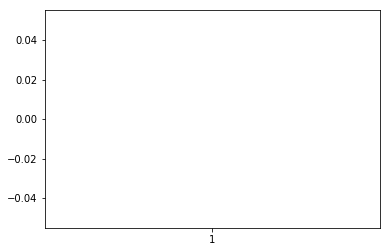

In [98]:
import matplotlib.pylab as plt
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.boxplot(df["Age"])

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

***
There was definitely a combination of both characteristics. Based off of the percentage of survivors based on class, 64% of first class passengers survived compared to 25% of third class. Of the first class survivors, 97% were women. Likewise with second and third class, with 93% and 51% of survivors being women, respectively.

### Problem 5 - No arm in another tentacle problem, eh?
***

_Octopuses have eight arms, which are often called tentacles._ 

While technically a fact about the noble octopus, this doesn't really do much for the imagination. Go find another octopus fact that you think is cool *and* that you think no one else is likely to report! In fact, *if your fact is unique, you'll earn extra credit on this problem*! Submit your fact [here](https://docs.google.com/forms/d/e/1FAIpQLScjminsyl9Q1d_OswAXHNLKPj9Gu-00qhVsy07VYDZC8d36LQ/viewform?usp=sf_link).

### Problem 6 - Dirty Data
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [28]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [95]:
unknowns = df.loc[(df["smoke"]== '9') & (df["parity"]=='9') & (df["bwt"]=='999') & (df["gestation"]==999) & 
       (df["age"]=='99') & (df["height"]=='99') & (df["weight"]=='999')]

KeyError: 'smoke'

**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_ authors Darrell Huff and Irving Geis describe many common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. 